# Loading Dataset

In [ ]:
from __future__ import print_function
from __future__ import division
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath=os.path.abspath("/content/Combined Data CSV - Corrected.csv")
data_diagnosis=pd.read_csv(filepath,sep=',')
data_diagnosis['sex']=(data_diagnosis['sex'] == 'male').astype(int) # 1 for male and 0 for female

filepath=os.path.abspath("/content/raw matrix 1.csv")
COP_data=pd.read_csv(filepath,sep=',',header=None)

#filepath=os.path.abspath("/content/raw matrix 1 names.csv")
#COP_data_names=pd.read_csv(filepath,sep=',')
#COP_data_names=np.transpose(COP_data_names)
#for i in range(len(data_features.index)):
#    COP_data_names.iloc[i,0]=(COP_data_names.iloc[i,0]).rstrip('.xlsx')
    
data = data_diagnosis.sort_values('name')
data = data.set_index('name')
data

,sex,age,disease name,layer 1,layer 2,layer 3,Open eye pressure center position (left and right),Center position of the eye pressure (front and back),Eye circumference area,Eye opening effective value area,Total eye-open path length,Eye opening unit area locus length,Eye opening average speed,Closed foot pressure center position (left and right),Eye pressure center position (front and back),Peripheral area with eyes closed,Eye closing effective value area,Total eye-closure length,Eye-closing unit area locus length,Eye closing average speed,Romberg rate (peripheral area),Romberg rate (total track length),Romberg rate (average speed)
name,,,,,,,,,,,,,,,,,,,,,,,
AIpt1,1,63,Meniere's disease,2,3,5,-0.301946,-2.436221,3.678812,1.765198,82.694026,22.478459,1.376456,-0.470896,-1.289913,3.315560,1.038198,111.146584,33.522720,1.849550,0.901258,1.344070,1.343705
AIpt10,1,43,Upper semicircular canal space syndrome (suspe...,2,3,5,1.110603,-2.546055,5.525864,2.931303,83.549253,15.119673,1.390455,1.256180,-1.205303,11.518841,5.787157,105.896299,9.193312,1.763266,2.084532,1.267472,1.268122
AIpt100,1,49,Lateral medullary syndrome,2,3,6,0.144791,-1.899829,5.564807,2.115183,84.355511,15.158750,1.404680,-0.173170,-1.272717,10.427815,3.219486,153.525659,14.722706,2.556891,1.873886,1.819984,1.820266
AIpt101,1,49,Lateral medullary syndrome,2,3,6,-1.256492,-2.176461,5.858314,2.380948,86.826209,14.821023,1.445719,-0.510439,-1.914177,8.786140,3.563550,159.638441,18.169348,2.657964,1.499773,1.838597,1.838507
AIpt102,1,49,Lateral medullary syndrome,2,3,6,0.198467,-2.268007,4.735147,1.914402,72.054228,15.216895,1.199829,-0.528095,-1.497339,8.637877,2.698100,119.422262,13.825419,1.988507,1.824205,1.657394,1.657326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AIty94,0,90,X,1,1,1,0.445904,-1.501358,4.894170,1.806517,95.357861,19.483968,1.587773,0.516717,-1.775909,5.173642,2.200779,114.220103,22.077311,1.902180,1.057103,1.197805,1.198017
AIty95,0,77,X,1,1,1,0.842453,0.047232,3.648768,1.128089,76.744596,21.033017,1.277067,0.547829,-1.449556,4.182806,1.491346,100.951372,24.134842,1.679230,1.146361,1.315420,1.314912
AIty96,1,75,X,1,1,1,1.002880,1.890723,4.430109,1.541949,129.011714,29.121566,2.140152,0.717137,1.227123,4.580283,1.207276,141.999373,31.002315,2.357212,1.033898,1.100670,1.101423


# Time Series Data Check / Organization / Scaling

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
0,-0.344182,-1.96280,-0.184442,-1.20622,1.02774,-1.13513,1.87825,-0.899307,1.011170,-1.759350,0.699148,-2.716960,-0.229993,-2.167590,0.866105,-0.576065,0.744334,-1.62496,0.983030,-1.04099,0.103599,-0.019847,-1.183430,-2.48081,1.153220,-3.80702,1.357890,-3.02774,-1.848280,-0.461718,0.209917,-1.08822,-0.939796,-0.537816,-0.939796,-0.537816,1.77427,1.21096,2.33455,-1.004910,...,2.92299,-0.008605,2.097700,1.53903,-1.584190,0.935112,-0.783181,0.666080,-0.696564,-1.248220,-0.445101,-1.04955,1.026830,0.301462,0.501406,1.043890,-0.020216,-0.982224,-0.202734,-1.86346,0.778430,-1.163290,0.872410,-1.42655,0.813210,0.717901,1.71281,-1.333360,1.44084,1.42080,1.48950,1.726410,0.442627,-0.933324,2.97785,0.103058,0.847989,0.978987,1.244250,2.76815
1,-0.293883,-1.96436,-0.168747,-1.19508,1.03058,-1.14435,1.86956,-0.894309,1.021460,-1.770210,0.807850,-2.680460,-0.240541,-2.168510,0.815784,-0.548946,0.746959,-1.63083,0.983515,-1.03721,0.099081,-0.027606,-1.199200,-2.49365,1.162770,-3.79651,1.361790,-3.05459,-1.854110,-0.480991,0.201683,-1.09506,-0.969619,-0.549895,-0.969619,-0.549895,1.76099,1.19600,2.34411,-0.997952,...,2.92052,-0.008107,2.084650,1.54673,-1.597760,0.951602,-0.799691,0.663313,-0.683475,-1.242230,-0.486137,-1.05304,1.019230,0.285198,0.510475,1.035870,-0.033252,-0.986361,-0.196789,-1.86263,0.787736,-1.155360,0.860988,-1.43928,0.825424,0.718545,1.70619,-1.354500,1.47132,1.40675,1.49477,1.720690,0.395260,-0.936436,3.06156,0.095402,0.848027,0.977912,1.245300,2.72957
2,-0.255882,-1.96179,-0.161194,-1.17464,1.03109,-1.15072,1.87184,-0.893419,1.035180,-1.777100,0.916096,-2.654550,-0.259573,-2.173900,0.775398,-0.519142,0.741395,-1.63783,0.976440,-1.03763,0.086784,-0.043806,-1.200650,-2.49497,1.172180,-3.80432,1.370880,-3.06271,-1.846170,-0.503683,0.196890,-1.07975,-0.998367,-0.575306,-0.998367,-0.575306,1.74408,1.17922,2.33061,-0.998981,...,2.92458,-0.006590,2.068120,1.54018,-1.604950,0.974870,-0.819683,0.654893,-0.682024,-1.227210,-0.537791,-1.04358,1.018550,0.260977,0.516044,1.033600,-0.065646,-0.988536,-0.206668,-1.85709,0.790978,-1.146490,0.850106,-1.45178,0.824277,0.713605,1.70735,-1.377020,1.48432,1.39699,1.49324,1.723780,0.343944,-0.954686,3.12506,0.098436,0.849073,0.977440,1.243910,2.70222
3,-0.227404,-1.95609,-0.167519,-1.16461,1.03168,-1.15899,1.86416,-0.891172,1.042930,-1.781570,1.004650,-2.618180,-0.273783,-2.173870,0.742109,-0.497085,0.743481,-1.64759,0.962377,-1.03511,0.076683,-0.054810,-1.209290,-2.50494,1.190580,-3.80333,1.376730,-3.07961,-1.844370,-0.516115,0.193626,-1.08573,-1.030540,-0.598287,-1.030540,-0.598287,1.73078,1.17527,2.33658,-0.981945,...,2.92234,0.008626,2.059270,1.53165,-1.613350,0.993826,-0.831556,0.653563,-0.684057,-1.222380,-0.586186,-1.04674,1.010620,0.238226,0.519642,1.024540,-0.072391,-0.990872,-0.226837,-1.84955,0.803783,-1.137100,0.837044,-1.45338,0.842770,0.711330,1.70815,-1.393900,1.49609,1.40268,1.49620,1.720490,0.295231,-0.965207,3.17742,0.090779,0.850935,0.966161,1.245470,2.68189
4,-0.208854,-1.94853,-0.174988,-1.16010,1.03257,-1.16928,1.85965,-0.890449,1.056010,-1.787320,1.087340,-2.599030,-0.298841,-2.169490,0.705559,-0.479718,0.733686,-1.65447,0.948301,-1.02969,0.060999,-0.057413,-1.218640,-2.50284,1.209100,-3.80132,1.372080,-3.08518,-1.847120,-0.519792,0.179756,-1.07921,-1.060150,-0.616849,-1.060150,-0.616849,1.72300,1.15758,2.31689,-0.990815,...,2.91390,0.015243,2.032540,1.53024,-1.626240,1.022200,-0.845565,0.646592,-0.678878,-1.225330,-0.641157,-1.04408,1.003720,0.216714,0.529428,1.017010,-0.086759,-0.998950,-0.243887,-1.83724,0.818623,-1.128190,0.829314,-1.46664,0.852045,0.709554,1.69185,-1.409570,1.50261,1.42015,1.49112,1.733120,0.246067,-0.989130,3.22178,0.076014,0.845310,0.9

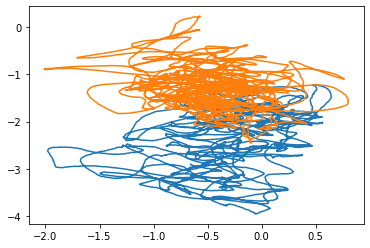

In [ ]:
# Plot for Sanity Check
plt.plot(COP_data[0],COP_data[1])
plt.plot(COP_data[2],COP_data[3])

COP_data

In [ ]:
X0_COP_data = pd.DataFrame(0, index=np.arange(len(COP_data)), columns=np.arange(len(data)))
Y0_COP_data = pd.DataFrame(0, index=np.arange(len(COP_data)), columns=np.arange(len(data)))
X1_COP_data = pd.DataFrame(0, index=np.arange(len(COP_data)), columns=np.arange(len(data)))
Y1_COP_data = pd.DataFrame(0, index=np.arange(len(COP_data)), columns=np.arange(len(data)))
for i in range(len(data)):
  X0_COP_data[i] = COP_data[i*4]
  Y0_COP_data[i] = COP_data[i*4+1]
  X1_COP_data[i] = COP_data[i*4+2]
  Y1_COP_data[i] = COP_data[i*4+3]
X0_COP_data.columns = data.index
Y0_COP_data.columns = data.index
X1_COP_data.columns = data.index
Y1_COP_data.columns = data.index

X0_COP_data = X0_COP_data.transpose()
Y0_COP_data = Y0_COP_data.transpose()
X1_COP_data = X1_COP_data.transpose()
Y1_COP_data = Y1_COP_data.transpose()

# Scaling
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(COP_data)
#COP_data = scaler.transform(COP_data)
#plt.plot(COP_data[0])
#plt.plot(COP_data[2])

# PREDICTORS (ONE-HOT ENCODING)

In [ ]:
# All layers in one (Value can be 1/4/5/6)
data.insert(6,"all layers",data['layer 3'])

# Layers 4: 1 if non-AB Central-Vestibular
data.insert(6,"layer 4",data['layer 3'])
for i in range(len(data)):
    if(data['layer 4'][i]==1 or data['layer 3'][i]==4):
        data['layer 4'][i]=0
    if(data['layer 4'][i]==5):
        data['layer 4'][i]=0
    if(data['layer 4'][i]==6):
        data['layer 4'][i]=1

# layer 1: 1 if AB 
data['layer 1']=(data['layer 1'] == 1).astype(int) 

# layer 2: 1 if non-AB non-Vestibular
for i in range(len(data)):
    if(data['layer 2'][i]==1):
        data['layer 2'][i]=0
    if(data['layer 2'][i]==3):
        data['layer 2'][i]=0
    if(data['layer 2'][i]==4):
        data['layer 2'][i]=1

# layer 3: 1 if non-AB Peripheral-Vestibular
for i in range(len(data)):
    if(data['layer 3'][i]==1 or data['layer 3'][i]==4):
        data['layer 3'][i]=0
    if(data['layer 3'][i]==5):
        data['layer 3'][i]=1
    if(data['layer 3'][i]==6):
        data['layer 3'][i]=0

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-pa

,sex,age,disease name,layer 1,layer 2,layer 3,layer 4,all layers,Open eye pressure center position (left and right),Center position of the eye pressure (front and back),Eye circumference area,Eye opening effective value area,Total eye-open path length,Eye opening unit area locus length,Eye opening average speed,Closed foot pressure center position (left and right),Eye pressure center position (front and back),Peripheral area with eyes closed,Eye closing effective value area,Total eye-closure length,Eye-closing unit area locus length,Eye closing average speed,Romberg rate (peripheral area),Romberg rate (total track length),Romberg rate (average speed)
name,,,,,,,,,,,,,,,,,,,,,,,,,
AIpt1,1,63,Meniere's disease,0,0,1,0,5,-0.301946,-2.436221,3.678812,1.765198,82.694026,22.478459,1.376456,-0.470896,-1.289913,3.315560,1.038198,111.146584,33.522720,1.849550,0.901258,1.344070,1.343705
AIpt10,1,43,Upper semicircular canal space syndrome (suspe...,0,0,1,0,5,1.110603,-2.546055,5.525864,2.931303,83.549253,15.119673,1.390455,1.256180,-1.205303,11.518841,5.787157,105.896299,9.193312,1.763266,2.084532,1.267472,1.268122
AIpt100,1,49,Lateral medullary syndrome,0,0,0,1,6,0.144791,-1.899829,5.564807,2.115183,84.355511,15.158750,1.404680,-0.173170,-1.272717,10.427815,3.219486,153.525659,14.722706,2.556891,1.873886,1.819984,1.820266
AIpt101,1,49,Lateral medullary syndrome,0,0,0,1,6,-1.256492,-2.176461,5.858314,2.380948,86.826209,14.821023,1.445719,-0.510439,-1.914177,8.786140,3.563550,159.638441,18.169348,2.657964,1.499773,1.838597,1.838507
AIpt102,1,49,Lateral medullary syndrome,0,0,0,1,6,0.198467,-2.268007,4.735147,1.914402,72.054228,15.216895,1.199829,-0.528095,-1.497339,8.637877,2.698100,119.422262,13.825419,1.988507,1.824205,1.657394,1.657326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AIty94,0,90,X,1,0,0,0,1,0.445904,-1.501358,4.894170,1.806517,95.357861,19.483968,1.587773,0.516717,-1.775909,5.173642,2.200779,114.220103,22.077311,1.902180,1.057103,1.197805,1.198017
AIty95,0,77,X,1,0,0,0,1,0.842453,0.047232,3.648768,1.128089,76.744596,21.033017,1.277067,0.547829,-1.449556,4.182806,1.491346,100.951372,24.134842,1.679230,1.146361,1.315420,1.314912
AIty96,1,75,X,1,0,0,0,1,1.002880,1.890723,4.430109,1.541949,129.011714,29.121566,2.140152,0.717137,1.227123,4.580283,1.207276,141.999373,31.002315,2.357212,1.033898,1.100670,1.101423


# TRAIN-VALIDATION-TEST SPLIT

In [ ]:
Y_data = data[list(data.columns[3:7])] #['layer 1', 'layer 2', 'layer 3', 'layers 1+2']

idx = np.random.permutation(Y_data.index)
Y_data = (Y_data.reindex(idx)).to_numpy()
X0_COP_data = (X0_COP_data.reindex(idx)).to_numpy()
Y0_COP_data = (Y0_COP_data.reindex(idx)).to_numpy()
X1_COP_data = (X1_COP_data.reindex(idx)).to_numpy()
Y1_COP_data = (Y1_COP_data.reindex(idx)).to_numpy()

#Next, we partition the randomly shuffled dataset into training, validation and testset according a ratio
train_ratio = 0.80
valid_ratio = 0.1
n_train = int(len(Y_data) * train_ratio)
n_valid = int(len(Y_data) * valid_ratio)

# Splitting the label data
Y_train, Y_valid, Y_test = Y_data[:n_train], Y_data[n_train:n_train+n_valid], Y_data[n_train+n_valid:]

In [ ]:
# Recombining the COP data then Splitting it
X_data = [[0 for c in range(len(COP_data))] for r in range(len(data))]
for i in range(len(COP_data)):
  for j in range(len(data)):
    X_data[j][i] = [X0_COP_data[j][i],Y0_COP_data[j][i],X1_COP_data[j][i],Y1_COP_data[j][i]]

X_train, X_valid, X_test = np.array(X_data[:n_train]), np.array(X_data[n_train:n_train+n_valid]), np.array(X_data[n_train+n_valid:])

# Reshaping for LSTM (https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/)


# NEURAL NETWORK (Keras)

In [ ]:
import numpy as np
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# All Layers 

In [ ]:
# All Layers / All COP data
Number_of_Classes = 4
Number_of_Features = 4 # X0,Y0,X1,Y1
LSTM_layer = 30
Dense_Layer = 30
epoch_number = 20

model = Sequential()
model.add(LSTM(LSTM_layer, input_shape=(6000,Number_of_Features),dropout=0.2))
model.add(Dense(Dense_Layer, activation='relu'))
model.add(Dense(Number_of_Classes, activation='softmax')) # Layer 1
#model.summary()

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

batch_size = 64
history1 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch_number, validation_data=(X_valid, Y_valid))

Epoch 1/20
10/10 [==============================] - 209s 21s/step - loss: 1.2908 - accuracy: 0.3866 - val_loss: 1.1694 - val_accuracy: 0.5068
Epoch 2/20
10/10 [==============================] - 220s 21s/step - loss: 1.1810 - accuracy: 0.4868 - val_loss: 1.1501 - val_accuracy: 0.5205
Epoch 3/20
10/10 [==============================] - 218s 21s/step - loss: 1.1501 - accuracy: 0.5116 - val_loss: 1.1697 - val_accuracy: 0.4384
Epoch 4/20
10/10 [==============================] - 204s 20s/step - loss: 1.1195 - accuracy: 0.5139 - val_loss: 1.1920 - val_accuracy: 0.4658
Epoch 5/20
10/10 [==============================] - 197s 20s/step - loss: 1.0892 - accuracy: 0.5190 - val_loss: 1.1921 - val_accuracy: 0.4384
Epoch 6/20
10/10 [==============================] - 197s 20s/step - loss: 1.1011 - accuracy: 0.5069 - val_loss: 1.1684 - val_accuracy: 0.5342
Epoch 7/20
10/10 [==============================] - 199s 20s/step - loss: 1.1266 - accuracy: 0.4975 - val_loss: 1.1560 - val_accuracy: 0.5068
Epoch 

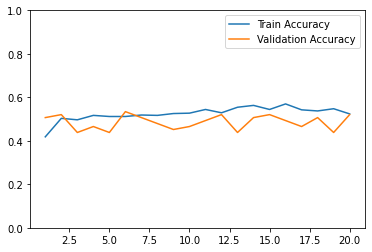

Test Accuracy: 0.527027027027027
Test F1-Score: 0.2695666340827631


In [ ]:
epochs = np.arange(epoch_number)+1
plt.plot(epochs,history1.history['accuracy'],label="Train Accuracy")
plt.plot(epochs,history1.history['val_accuracy'],label="Validation Accuracy")
plt.ylim([0, 1])
plt.legend()
plt.show()

#score, acc = model.evaluate(X_test, Y_test,batch_size=batch_size)
#print('Test score:', score)
#print('Test accuracy:', acc)
Y_prediction = model.predict(X_test,batch_size=batch_size)
for i in range(len(Y_prediction)):
  for j in range(len(Y_prediction[0])):
    if Y_prediction[i][j]==max(Y_prediction[i]):
      Y_prediction[i][j] = 1
    else:
      Y_prediction[i][j] = 0
print('Test Accuracy:', accuracy_score(Y_test,Y_prediction))
print('Test F1-Score:', f1_score(Y_test,Y_prediction,average='macro'))

# Only Layer 1

In [ ]:
Y_train_1, Y_valid_1, Y_test_1 = np.zeros((len(Y_train),2),dtype=int), np.zeros((len(Y_valid),2),dtype=int), np.zeros((len(Y_test),2),dtype=int)
for i in range(len(Y_train)):
  Y_train_1[i] = [Y_train[i][0],1-Y_train[i][0]]
for i in range(len(Y_valid)):
  Y_valid_1[i] = [Y_valid[i][0],1-Y_valid[i][0]]
for i in range(len(Y_test)):
  Y_test_1[i] = [Y_test[i][0],1-Y_test[i][0]]

In [ ]:
# All Layers / All COP data
Number_of_Classes = 2
Number_of_Features = 4 # X0,Y0,X1,Y1
#LSTM_layer = 50
#Dense_Layer = 50
#epoch_number = 20

model_1 = Sequential()
model_1.add(LSTM(LSTM_layer, input_shape=(6000,Number_of_Features),dropout=0.2))
model_1.add(Dense(Dense_Layer, activation='relu'))
model_1.add(Dense(Number_of_Classes, activation='softmax')) # Layer 1
#model_1.summary()

model_1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

batch_size = 64
history2 = model_1.fit(X_train, Y_train_1, batch_size=batch_size, epochs=epoch_number, validation_data=(X_valid, Y_valid_1))

Epoch 1/20
10/10 [==============================] - 183s 18s/step - loss: 0.7213 - accuracy: 0.5348 - val_loss: 0.6890 - val_accuracy: 0.4247
Epoch 2/20
10/10 [==============================] - 199s 20s/step - loss: 0.6682 - accuracy: 0.6213 - val_loss: 0.6981 - val_accuracy: 0.6027
Epoch 3/20
10/10 [==============================] - 196s 20s/step - loss: 0.6643 - accuracy: 0.5984 - val_loss: 0.6988 - val_accuracy: 0.6027
Epoch 4/20
10/10 [==============================] - 206s 20s/step - loss: 0.6622 - accuracy: 0.6023 - val_loss: 0.7025 - val_accuracy: 0.5068
Epoch 5/20
10/10 [==============================] - 216s 21s/step - loss: 0.6563 - accuracy: 0.6018 - val_loss: 0.7158 - val_accuracy: 0.5342
Epoch 6/20
10/10 [==============================] - 205s 21s/step - loss: 0.6431 - accuracy: 0.6310 - val_loss: 0.7027 - val_accuracy: 0.5616
Epoch 7/20
10/10 [==============================] - 203s 20s/step - loss: 0.6196 - accuracy: 0.6255 - val_loss: 0.7415 - val_accuracy: 0.5342
Epoch 

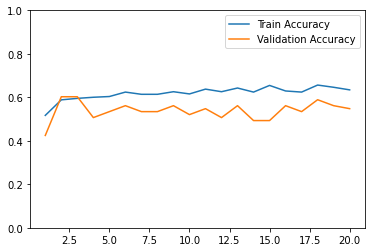

Test Accuracy: 0.5540540540540541
Test F1-Score: 0.5533199195171026


In [ ]:
epochs = np.arange(epoch_number)+1
plt.plot(epochs,history2.history['accuracy'],label="Train Accuracy")
plt.plot(epochs,history2.history['val_accuracy'],label="Validation Accuracy")
plt.ylim([0, 1])
plt.legend()
plt.show()

#score, acc = model_1.evaluate(X_test, Y_test_1,batch_size=batch_size)
#print('Test score:', score)
#print('Test accuracy:', acc)
Y_prediction_1 = model_1.predict(X_test,batch_size=batch_size)
for i in range(len(Y_prediction_1)):
  for j in range(len(Y_prediction_1[0])):
    if Y_prediction_1[i][j]==max(Y_prediction_1[i]):
      Y_prediction_1[i][j] = 1
    else:
      Y_prediction_1[i][j] = 0
print('Test Accuracy:', accuracy_score(Y_test_1,Y_prediction_1))
print('Test F1-Score:', f1_score(Y_test_1,Y_prediction_1,average='macro'))